In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)
# Ground truth = [0.5, 0.5, 0., 0.0, 0.0, -0.05]
# fn1 = "MC_results/scene1_ICET_estimates.npy" #with extended surface mitigation
# fn2 = "MC_results/scene1_ICET_pred_stds.npy"
# fn1 = "MC_results/scene1_ICET_estimates_NM.npy" #no extended surface mitigation
# fn2 = "MC_results/scene1_ICET_pred_stds_NM.npy"

fn1 = "MC_results/test_ICET_estimates.npy" 
fn2 = "MC_results/test_ICET_pred_stds.npy"


est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

[9.50068837e-05 1.51882334e-03 6.93788631e-05]
[0.00075273 0.0009839  0.00087852]


In [60]:
#calc mean and std
mean = np.mean(est, axis = 0)
std = np.std(est, axis = 0)

print(mean)
print(std[:3])
print(np.rad2deg(std[3:]))

[-0.72027602 -0.5010607   0.28809793  0.09116076  0.05102569 -0.08664148]
[0.71793021 0.5286794  0.38735274]
[5.92146851 1.42951806 6.92633386]


In [36]:
#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean)
std = np.std(est, axis = 0)

print(std[:3], np.rad2deg(std[3:]))
# print(std[:3], std[3:])

[9.08332717e-05 5.09211830e-04 6.88964606e-05] [0.00079396 0.00102918 0.00088241]


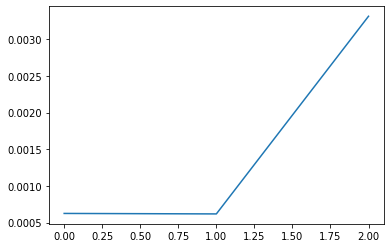

In [67]:
#for debug - plot pred_stds to make sure we don't have any outlier trials
fig, ax = plt.subplots()

ax.plot(pred_stds[:,1])

In [66]:
print(est[:3,:])

[[-4.99942094e-01 -5.00393391e-01 -1.20997429e-04  2.28229910e-05
   1.59926713e-05 -3.82773578e-06]
 [-5.00072777e-01 -4.99733150e-01 -6.22849911e-05  1.57058239e-05
  -9.17352736e-06  1.45286322e-06]
 [-5.00048757e-01 -1.26519620e-01 -1.95771456e-04 -7.79749826e-06
  -1.09523535e-06  5.28246164e-06]]
